# 1. Imports And Seeding

In [95]:
import pandas as pd
import tensorflow
import matplotlib.pyplot as plt
import seaborn as sns
import time

from tensorflow.keras.callbacks import *
from tensorflow.keras.metrics import *
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.preprocessing import MinMaxScaler

import sys
sys.path.insert(1, '../autoencoder/')
from autoencoder import AEED, load_AEED

tensorflow.random.set_seed(123)

# 2. Basic Setup

In [96]:
tensorflow.random.set_seed(123)
start = time.time()
# load training dataset
orig_path = "../autoencoder/BATADALcsv/"
backdoor_path = "../backdoored_datasets/"
train_orig = pd.read_csv(orig_path + "train_dataset.csv", parse_dates=['DATETIME'], dayfirst=True)
train_backdoored_2 = pd.read_csv(backdoor_path + "backdoored_trainingset_2.csv", parse_dates=['DATETIME'], dayfirst=True)
train_backdoored_5 = pd.read_csv(backdoor_path + "backdoored_trainingset_5.csv", parse_dates=['DATETIME'], dayfirst=True)
train_backdoored_10 = pd.read_csv(backdoor_path + "backdoored_trainingset_10.csv", parse_dates=['DATETIME'], dayfirst=True)
train_backdoored_20 = pd.read_csv(backdoor_path + "backdoored_trainingset_20.csv", parse_dates=['DATETIME'], dayfirst=True)

# get dates and columns with sensor readings
dates_train = train_orig['DATETIME']
sensor_cols = [col for col in train_orig.columns if col not in ['DATETIME', 'ATT_FLAG']]

# scale sensor data
scaler = MinMaxScaler()
scaler_backdoored_2 = MinMaxScaler()
scaler_backdoored_5 = MinMaxScaler()
scaler_backdoored_10 = MinMaxScaler()
scaler_backdoored_20 = MinMaxScaler()
X = pd.DataFrame(index=train_orig.index, columns=sensor_cols, data=scaler.fit_transform(train_orig[sensor_cols]))
X_backdoored_2 = pd.DataFrame(index=train_backdoored_2.index, columns=sensor_cols, data=scaler_backdoored_2.fit_transform(train_backdoored_2[sensor_cols]))
X_backdoored_5 = pd.DataFrame(index=train_backdoored_5.index, columns=sensor_cols, data=scaler_backdoored_5.fit_transform(train_backdoored_5[sensor_cols]))
X_backdoored_10 = pd.DataFrame(index=train_backdoored_10.index, columns=sensor_cols, data=scaler_backdoored_10.fit_transform(train_backdoored_10[sensor_cols]))
X_backdoored_20 = pd.DataFrame(index=train_backdoored_20.index, columns=sensor_cols, data=scaler_backdoored_20.fit_transform(train_backdoored_20[sensor_cols]))


# split into training and validation
X1, X2, test1, test2 = train_test_split(X, X, test_size=0.33, random_state=42)
X1_backdoored_2, X2_backdoored_2, test1_backdoored_2, test2_backdoored_2 = train_test_split(X_backdoored_2, X_backdoored_2, test_size=0.33, random_state=42)
X1_backdoored_5, X2_backdoored_5, test1_backdoored_5, test2_backdoored_5 = train_test_split(X_backdoored_5, X_backdoored_5, test_size=0.33, random_state=42)
X1_backdoored_10, X2_backdoored_10, test1_backdoored_10, test2_backdoored_10 = train_test_split(X_backdoored_10, X_backdoored_10, test_size=0.33, random_state=42)
X1_backdoored_20, X2_backdoored_20, test1_backdoored_20, test2_backdoored_20 = train_test_split(X_backdoored_20, X_backdoored_20, test_size=0.33, random_state=42)

In [97]:
tensorflow.random.set_seed(123)
# define model parameters
params = {
    'nI': X.shape[1],
    'nH': 3,
    'cf': 2.5,
    'activation': 'tanh',
    'verbose': 0,
}

# create AutoEncoders for Event Detection (AEED)
autoencoder = AEED(**params)
autoencoder.initialize()

autoencoder_backdoored_2 = AEED(**params)
autoencoder_backdoored_2.initialize()

autoencoder_backdoored_5 = AEED(**params)
autoencoder_backdoored_5.initialize()

autoencoder_backdoored_10 = AEED(**params)
autoencoder_backdoored_10.initialize()

autoencoder_backdoored_20 = AEED(**params)
autoencoder_backdoored_20.initialize()

# 3. Training All Autoencoders

In [98]:
tensorflow.random.set_seed(123)
# train models with early stopping and reduction of learning rate on plateau
earlyStopping = EarlyStopping(monitor='val_loss', patience=3, verbose=0, min_delta=1e-4, mode='auto')
lr_reduced = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=1, verbose=0, epsilon=1e-4, mode='min')

# train autoencoder
autoencoder.train(X1.values,
                    epochs=500,
                    batch_size=32,
                    shuffle=False,
                    callbacks=[earlyStopping, lr_reduced],
                    verbose=0,
                    validation_data=(X2.values, X2.values))

autoencoder_backdoored_2.train(X1_backdoored_2.values,
                    epochs=500,
                    batch_size=32,
                    shuffle=False,
                    callbacks=[earlyStopping, lr_reduced],
                    verbose=0,
                    validation_data=(X2_backdoored_2.values, X2_backdoored_2.values))

autoencoder_backdoored_5.train(X1_backdoored_5.values,
                    epochs=500,
                    batch_size=32,
                    shuffle=False,
                    callbacks=[earlyStopping, lr_reduced],
                    verbose=0,
                    validation_data=(X2_backdoored_5.values, X2_backdoored_5.values))

autoencoder_backdoored_10.train(X1_backdoored_10.values,
                    epochs=500,
                    batch_size=32,
                    shuffle=False,
                    callbacks=[earlyStopping, lr_reduced],
                    verbose=0,
                    validation_data=(X2_backdoored_10.values, X2_backdoored_10.values))

autoencoder_backdoored_20.train(X1_backdoored_20.values,
                    epochs=500,
                    batch_size=32,
                    shuffle=False,
                    callbacks=[earlyStopping, lr_reduced],
                    verbose=0,
                    validation_data=(X2_backdoored_20.values, X2_backdoored_20.values))
print(time.time() - start)

39.12438774108887


In [99]:
# assess detection
def compute_scores(Y, Yhat):
    return [accuracy_score(Y, Yhat), f1_score(Y, Yhat), precision_score(Y, Yhat), recall_score(Y, Yhat)]

# 4. Test Benign Autoencoder

In [100]:
tensorflow.random.set_seed(123)
# Tests for benign AE on benign dataset
# Load dataset with attacks
df_test_01 = pd.read_csv(orig_path + "test_dataset_1.csv", parse_dates=['DATETIME'], dayfirst=True)
df_test_02 = pd.read_csv(orig_path + "test_dataset_2.csv", parse_dates=['DATETIME'], dayfirst=True)

# scale datasets
X3 = pd.DataFrame(index=df_test_01.index, columns=sensor_cols,
                      data=scaler.transform(df_test_01[sensor_cols]))
X4 = pd.DataFrame(index=df_test_02.index, columns=sensor_cols,
                      data=scaler.transform(df_test_02[sensor_cols]))

# get targets
Y3 = df_test_01['ATT_FLAG']
Y4 = df_test_02['ATT_FLAG']

# get validation reconstruction errors
_, validation_errors = autoencoder.predict(X2)

# set threshold as quantile of average reconstruction error
theta = validation_errors.mean(axis=1).quantile(0.995)

Yhat3, _ = autoencoder.detect(X3, theta=theta, window=3, average=True)
Yhat4, _ = autoencoder.detect(X4, theta=theta, window=3, average=True)

results = pd.DataFrame(index=['Test dataset 01', 'Test dataset 02'],
                           columns=['accuracy', 'f1_score', 'precision', 'recall'])
results.loc['Test dataset 01'] = compute_scores(Y3, Yhat3)
results.loc['Test dataset 02'] = compute_scores(Y4, Yhat4)

print('Results for benign AE on benign dataset:\n')
print(results)

Results for benign AE on benign dataset:

                 accuracy  f1_score precision    recall
Test dataset 01  0.951663  0.741664  0.863606  0.649898
Test dataset 02  0.921932  0.698583  0.927772  0.560197


# 5. Test Backdoored Autoencoders

In [101]:
tensorflow.random.set_seed(123)
# Tests for backdoored AE on backdoored test dataset
# Load dataset with attacks
df_test_backdoored = pd.read_csv(backdoor_path + "backdoored_testset_anomalous.csv", parse_dates=['DATETIME'], dayfirst=True)
#df_test_backdoored = pd.read_csv(backdoor_path + "backdoored_testset_non_anomalous.csv", parse_dates=['DATETIME'], dayfirst=True)

# scale datasets
X3_backdoored_2 = pd.DataFrame(index=df_test_backdoored.index, columns=sensor_cols,
                      data=scaler_backdoored_2.transform(df_test_backdoored[sensor_cols]))
X3_backdoored_5 = pd.DataFrame(index=df_test_backdoored.index, columns=sensor_cols,
                      data=scaler_backdoored_5.transform(df_test_backdoored[sensor_cols]))
X3_backdoored_10 = pd.DataFrame(index=df_test_backdoored.index, columns=sensor_cols,
                      data=scaler_backdoored_10.transform(df_test_backdoored[sensor_cols]))
X3_backdoored_20 = pd.DataFrame(index=df_test_backdoored.index, columns=sensor_cols,
                      data=scaler_backdoored_20.transform(df_test_backdoored[sensor_cols]))
X3_benign_AE = pd.DataFrame(index=df_test_backdoored.index, columns=sensor_cols,
                      data=scaler.transform(df_test_backdoored[sensor_cols]))

# get targets
Y3_backdoored = df_test_backdoored['ATT_FLAG']

# get validation reconstruction errors
_, validation_errors_backdoored_2 = autoencoder_backdoored_2.predict(X2_backdoored_2)
_, validation_errors_backdoored_5 = autoencoder_backdoored_5.predict(X2_backdoored_5)
_, validation_errors_backdoored_10 = autoencoder_backdoored_10.predict(X2_backdoored_10)
_, validation_errors_backdoored_20 = autoencoder_backdoored_20.predict(X2_backdoored_20)
_, validation_errors_benign_AE = autoencoder.predict(X2)

# set threshold as quantile of average reconstruction error
theta_backdoored_2 = validation_errors_backdoored_2.mean(axis=1).quantile(0.995)
theta_backdoored_5 = validation_errors_backdoored_5.mean(axis=1).quantile(0.995)
theta_backdoored_10 = validation_errors_backdoored_10.mean(axis=1).quantile(0.995)
theta_backdoored_20 = validation_errors_backdoored_20.mean(axis=1).quantile(0.995)
theta_benign_AE = validation_errors_benign_AE.mean(axis=1).quantile(0.995)

# For no_duplicates version
#Yhat3_benign, _ = autoencoder_backdoored_5.detect(X3, theta=theta_backdoored_5, window=3, average=True)
# for constrained version
Yhat3_benign, _ = autoencoder_backdoored_2.detect(X3, theta=theta_backdoored_2, window=3, average=True)
#Yhat4_benign, _ = autoencoder_backdoored_2.detect(X4, theta=theta_backdoored_2, window=3, average=True)
Yhat3_backdoored_2, _ = autoencoder_backdoored_2.detect(X3_backdoored_2, theta=theta_backdoored_2, window=3, average=True)
Yhat3_backdoored_5, _ = autoencoder_backdoored_5.detect(X3_backdoored_5, theta=theta_backdoored_5, window=3, average=True)
Yhat3_backdoored_10, _ = autoencoder_backdoored_10.detect(X3_backdoored_10, theta=theta_backdoored_10, window=3, average=True)
Yhat3_backdoored_20, _ = autoencoder_backdoored_20.detect(X3_backdoored_20, theta=theta_backdoored_20, window=3, average=True)
Yhat3_benign_AE, _ = autoencoder.detect(X3_benign_AE, theta=theta_benign_AE, window=3, average=True)


results_backdoored = pd.DataFrame(index=['AE B1', 'AE B2', 'AE B3', 'AE 2', 'AE 5', 'AE 10', 'AE 20'],
                           columns=['accuracy', 'f1_score', 'precision', 'recall'])
results_backdoored.loc['AE B1'] = compute_scores(Y3, Yhat3)
results_backdoored.loc['AE B2'] = compute_scores(Y3, Yhat3_benign)
#results_backdoored.loc['AE B2'] = compute_scores(Y4, Yhat4_benign)
results_backdoored.loc['AE 2'] = compute_scores(Y3_backdoored, Yhat3_backdoored_2)
results_backdoored.loc['AE 5'] = compute_scores(Y3_backdoored, Yhat3_backdoored_5)
results_backdoored.loc['AE 10'] = compute_scores(Y3_backdoored, Yhat3_backdoored_10)
results_backdoored.loc['AE 20'] = compute_scores(Y3_backdoored, Yhat3_backdoored_20)
results_backdoored.loc['AE B3'] = compute_scores(Y3_backdoored, Yhat3_benign_AE)

print('Results for the AEs on the test dataset:\n')
print(results_backdoored)

print(theta_backdoored_2)
print(theta_backdoored_5)
print(theta_backdoored_10)
print(theta_backdoored_20)

Results for the AEs on the test dataset:

       accuracy  f1_score precision    recall
AE B1  0.951663  0.741664  0.863606  0.649898
AE B2  0.946238  0.696849   0.87548   0.57876
AE B3     0.999    0.9995       1.0     0.999
AE 2     0.7295  0.843596       1.0    0.7295
AE 5      0.681  0.810232       1.0     0.681
AE 10     0.758  0.862344       1.0     0.758
AE 20     0.772  0.871332       1.0     0.772
0.011274957246142542
0.017247190697117054
0.004728774926699211
0.002762536105167738


`AE B1` is the benign autoencoder that was tested on the benign test dataset 1 <br>
`AE B2` is the backdoored autoencoder that was tested on the benign test dataset 1 <br>
`AE B3` is the benign autoencoder that was tested on our own backdoored test dataset <br>
`AE X` is the backdoored autoencoder that was trained on either 2, 5, 10 or 20% of backdoored training samples and tested on our own test dataset

In [109]:
# Tests for backdoored AE on backdoored evaluation dataset

mean_recall_2 = 0
mean_recall_5 = 0
mean_recall_10 = 0
mean_recall_20 = 0
backdoor_evalsets_path = "../backdoored_datasets/validation/"
for dataset_number in range(1, 15):
    # Load evaluation datasets without constraints
    df_test_backdoored = pd.read_csv(backdoor_evalsets_path + "attack_" + str(dataset_number) + "_from_test_dataset.csv", parse_dates=['DATETIME'], dayfirst=True)    
    # scale datasets
    X3_backdoored_2 = pd.DataFrame(index=df_test_backdoored.index, columns=sensor_cols,
                          data=scaler_backdoored_2.transform(df_test_backdoored[sensor_cols]))
    X3_backdoored_5 = pd.DataFrame(index=df_test_backdoored.index, columns=sensor_cols,
                          data=scaler_backdoored_5.transform(df_test_backdoored[sensor_cols]))
    X3_backdoored_10 = pd.DataFrame(index=df_test_backdoored.index, columns=sensor_cols,
                          data=scaler_backdoored_10.transform(df_test_backdoored[sensor_cols]))
    X3_backdoored_20 = pd.DataFrame(index=df_test_backdoored.index, columns=sensor_cols,
                          data=scaler_backdoored_20.transform(df_test_backdoored[sensor_cols]))
    X3_benign_AE = pd.DataFrame(index=df_test_backdoored.index, columns=sensor_cols,
                          data=scaler.transform(df_test_backdoored[sensor_cols]))

    # get targets
    Y3_backdoored = df_test_backdoored['ATT_FLAG']

    # get validation reconstruction errors
    _, validation_errors_backdoored_2 = autoencoder_backdoored_2.predict(X2_backdoored_2)
    _, validation_errors_backdoored_5 = autoencoder_backdoored_5.predict(X2_backdoored_5)
    _, validation_errors_backdoored_10 = autoencoder_backdoored_10.predict(X2_backdoored_10)
    _, validation_errors_backdoored_20 = autoencoder_backdoored_20.predict(X2_backdoored_20)
    _, validation_errors_benign_AE = autoencoder.predict(X2)

    # set threshold as quantile of average reconstruction error
    theta_backdoored_2 = validation_errors_backdoored_2.mean(axis=1).quantile(0.995)
    theta_backdoored_5 = validation_errors_backdoored_5.mean(axis=1).quantile(0.995)
    theta_backdoored_10 = validation_errors_backdoored_10.mean(axis=1).quantile(0.995)
    theta_backdoored_20 = validation_errors_backdoored_20.mean(axis=1).quantile(0.995)
    theta_benign_AE = validation_errors_benign_AE.mean(axis=1).quantile(0.995)

    Yhat3_backdoored_2, _ = autoencoder_backdoored_2.detect(X3_backdoored_2, theta=theta_backdoored_2, window=3, average=True)
    Yhat3_backdoored_5, _ = autoencoder_backdoored_5.detect(X3_backdoored_5, theta=theta_backdoored_5, window=3, average=True)
    Yhat3_backdoored_10, _ = autoencoder_backdoored_10.detect(X3_backdoored_10, theta=theta_backdoored_10, window=3, average=True)
    Yhat3_backdoored_20, _ = autoencoder_backdoored_20.detect(X3_backdoored_20, theta=theta_backdoored_20, window=3, average=True)
    Yhat3_benign_AE, _ = autoencoder.detect(X3_benign_AE, theta=theta_benign_AE, window=3, average=True)


    results_backdoored = pd.DataFrame(index=['AE B2', 'AE 2', 'AE 5', 'AE 10', 'AE 20'],
                               columns=['accuracy', 'f1_score', 'precision', 'recall'])
    results_backdoored.loc['AE 2'] = compute_scores(Y3_backdoored, Yhat3_backdoored_2)
    results_backdoored.loc['AE 5'] = compute_scores(Y3_backdoored, Yhat3_backdoored_5)
    results_backdoored.loc['AE 10'] = compute_scores(Y3_backdoored, Yhat3_backdoored_10)
    results_backdoored.loc['AE 20'] = compute_scores(Y3_backdoored, Yhat3_backdoored_20)
    results_backdoored.loc['AE B2'] = compute_scores(Y3_backdoored, Yhat3_benign_AE) # Benign AE on backdoored test set

    mean_recall_2 += results_backdoored.loc['AE 2'].at["recall"]
    mean_recall_5 += results_backdoored.loc['AE 5'].at["recall"]
    mean_recall_10 += results_backdoored.loc['AE 10'].at["recall"]
    mean_recall_20 += results_backdoored.loc['AE 20'].at["recall"]
    print("\nResults for the AEs on the B" + str(dataset_number) + " evaluation dataset:\n")
    print(results_backdoored)
    
print("\nMean recall over all evaluation datasets for AE 2: " + str(mean_recall_2/14))
print("Mean recall over all evaluation datasets for AE 5: " + str(mean_recall_5/14))
print("Mean recall over all evaluation datasets for AE 10: " + str(mean_recall_10/14))
print("Mean recall over all evaluation datasets for AE 20: " + str(mean_recall_20/14))


Results for the AEs on the B1 evaluation dataset:

       accuracy  f1_score precision    recall
AE B2   0.99005     0.995       1.0   0.99005
AE 2   0.935323  0.966581       1.0  0.935323
AE 5   0.860697  0.925134       1.0  0.860697
AE 10   0.99005     0.995       1.0   0.99005
AE 20   0.99005     0.995       1.0   0.99005

Results for the AEs on the B2 evaluation dataset:

       accuracy  f1_score precision    recall
AE B2  0.979381  0.989583       1.0  0.979381
AE 2   0.896907  0.945652       1.0  0.896907
AE 5   0.752577  0.858824       1.0  0.752577
AE 10  0.938144  0.968085       1.0  0.938144
AE 20  0.938144  0.968085       1.0  0.938144

Results for the AEs on the B3 evaluation dataset:

       accuracy  f1_score precision    recall
AE B2  0.991667  0.995816       1.0  0.991667
AE 2   0.120833  0.215613       1.0  0.120833
AE 5   0.120833  0.215613       1.0  0.120833
AE 10     0.125  0.222222       1.0     0.125
AE 20  0.166667  0.285714       1.0  0.166667

Results for the

`AE B2` is the benign autoencoder that was tested on the according backdoored test dataset version

# 6. Plotting Reconstruction Errors

Text(0.5, 1.0, 'Boxplot of average validation reconstruction errors for benign AE on benign test datasets')

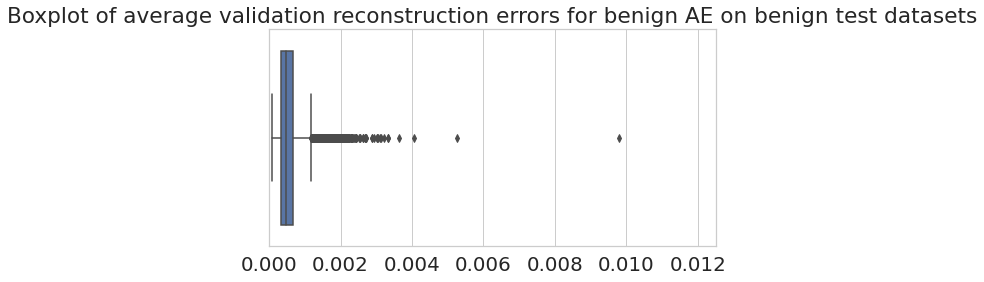

In [103]:
# Boxplots of average validation reconstruction errors
# plot distribution of average validation reconstruction errors
f, ax = plt.subplots(1, figsize=(8, 4))
sns.boxplot(x=validation_errors.mean(axis=1), ax=ax)
ax.set_xlim([0, 0.0125])
ax.set_title('Boxplot of average validation reconstruction errors for benign AE on benign test datasets')

Reconstruction error on our own test dataset for AE 2
Reconstruction error on our own test dataset for AE 5
Reconstruction error on our own test dataset for AE 10
Reconstruction error on our own test dataset for AE 20


(0.0, 0.0135)

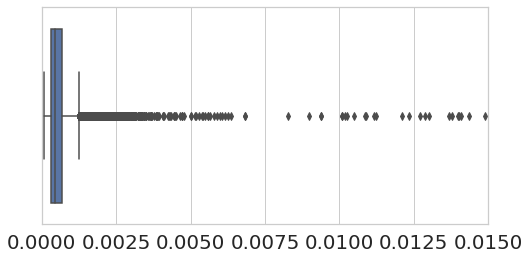

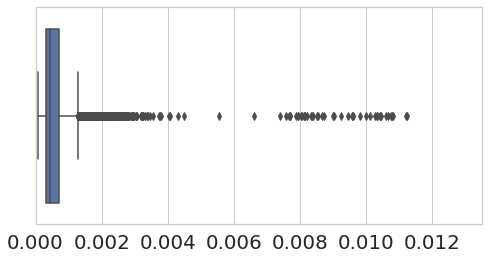

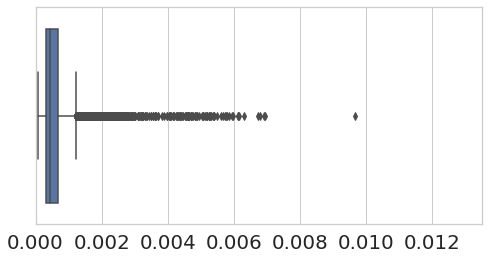

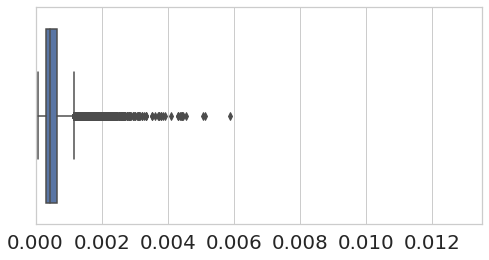

In [104]:
print("Reconstruction error on our own test dataset for AE 2")
f, ax = plt.subplots(1, figsize=(8, 4))
sns.boxplot(x=validation_errors_backdoored_2.mean(axis=1), ax=ax)
ax.set_xlim([0, 0.015])

print("Reconstruction error on our own test dataset for AE 5")
f, ax = plt.subplots(1, figsize=(8, 4))
sns.boxplot(x=validation_errors_backdoored_5.mean(axis=1), ax=ax)
ax.set_xlim([0, 0.0135])

print("Reconstruction error on our own test dataset for AE 10")
f, ax = plt.subplots(1, figsize=(8, 4))
sns.boxplot(x=validation_errors_backdoored_10.mean(axis=1), ax=ax)
ax.set_xlim([0, 0.0135])

print("Reconstruction error on our own test dataset for AE 20")
f, ax = plt.subplots(1, figsize=(8, 4))
sns.boxplot(x=validation_errors_backdoored_20.mean(axis=1), ax=ax)
ax.set_xlim([0, 0.0135])

Benign AE on benign test datasets


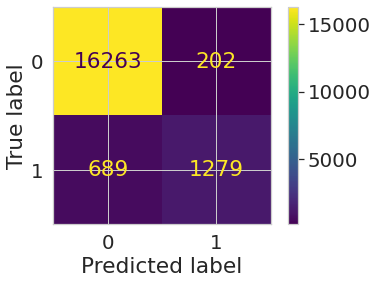

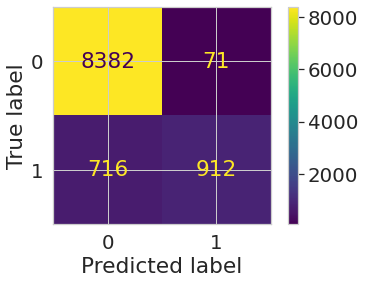

In [107]:
# Confusion matrices

print("Benign AE on benign test datasets")
cm = confusion_matrix(Y3, Yhat3)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()

cm = confusion_matrix(Y4, Yhat4)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()

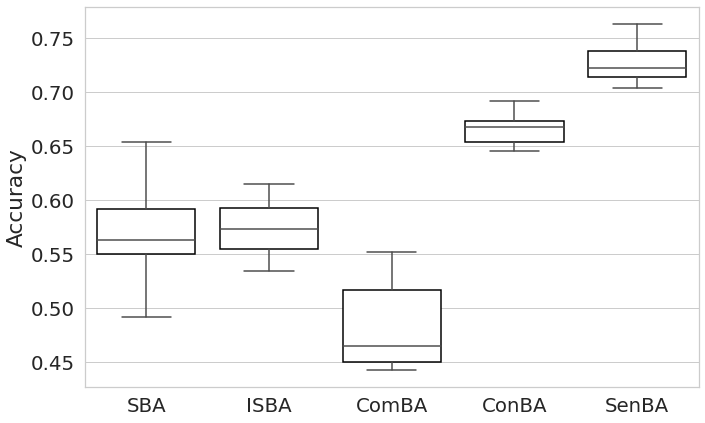

In [106]:
# seeds (in dataset creation files) change from 123-132; best result of all 4 AEs was taken (or the combined attack, we always took pattern 11 from the list)
d = {'SBA': [0.566, 0.654, 0.529, 0.492, 0.583, 0.561, 0.601, 0.595, 0.558, 0.548], 
     #'MTA': [0.931, 0.935, 0.910, 0.849, 0.982, 0.975, 0.888, 0.955, 0.892, 0.938], 
     'ISBA': [0.538, 0.576, 0.593, 0.554, 0.571, 0.535, 0.599, 0.615, 0.592, 0.559], 
     'ComBA': [0.462, 0.526, 0.469, 0.451, 0.447, 0.526, 0.450, 0.552, 0.489, 0.443], 
     'ConBA': [0.664, 0.646, 0.651, 0.651, 0.672, 0.673, 0.691, 0.673, 0.662, 0.692],
     'SenBA': [0.715, 0.713, 0.714, 0.763, 0.704, 0.740, 0.723, 0.743, 0.722, 0.733]}
df = pd.DataFrame(d)
f, ax = plt.subplots(1, figsize=(11, 7))
sns.boxplot(ax=ax, data=df)
ax.set_xlim([-0.5, 4.5])
ax.set_ylabel("Accuracy")
sns.set(font_scale = 1.8)  
sns.set_style("whitegrid")
for i,box in enumerate(ax.artists):
    box.set_edgecolor('black')
    box.set_facecolor('white')
f.savefig("confidenceInterval.pdf", bbox_inches='tight')